In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = "DejaVu Sans"
graph.rcParams["font.size"] = "12"
graph.rcParams['image.cmap'] = 'rainbow'
graph.rcParams['axes.facecolor'] = 'white'
graph.rcParams['figure.facecolor'] = 'white'
import numpy as np
import pandas as pd

dataset = pd.read_csv('wiki_movie_plots.csv')

print(dataset.head())

   Release Year                             Title Origin/Ethnicity  \
0          1901            Kansas Saloon Smashers         American   
1          1901     Love by the Light of the Moon         American   
2          1901           The Martyred Presidents         American   
3          1901  Terrible Teddy, the Grizzly King         American   
4          1902            Jack and the Beanstalk         American   

                             Director Cast    Genre  \
0                             Unknown  NaN  unknown   
1                             Unknown  NaN  unknown   
2                             Unknown  NaN  unknown   
3                             Unknown  NaN  unknown   
4  George S. Fleming, Edwin S. Porter  NaN  unknown   

                                           Wiki Page  \
0  https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...   
1  https://en.wikipedia.org/wiki/Love_by_the_Ligh...   
2  https://en.wikipedia.org/wiki/The_Martyred_Pre...   
3  https://en.wikipedia.

In [2]:
dataset = dataset.drop(['Cast', 'Director', 'Wiki Page', 'Origin/Ethnicity', 'Release Year', 'Title'], axis = 1)
print(dataset.head())

     Genre                                               Plot
0  unknown  A bartender is working at a saloon, serving dr...
1  unknown  The moon, painted with a smiling face hangs ov...
2  unknown  The film, just over a minute long, is composed...
3  unknown  Lasting just 61 seconds and consisting of two ...
4  unknown  The earliest known adaptation of the classic f...


In [3]:
known = dataset['Genre'] != 'unknown'
print(known.head())

0    False
1    False
2    False
3    False
4    False
Name: Genre, dtype: bool


In [4]:
dataset = dataset[known]
print(dataset.shape)
print(dataset.head())

(28803, 2)
                         Genre  \
6                      western   
7                       comedy   
10                       short   
11  short action/crime western   
12                  short film   

                                                 Plot  
6   The film opens with two bandits breaking into ...  
7   The film is about a family who move to the sub...  
10  The Rarebit Fiend gorges on Welsh rarebit at a...  
11  The film features a train traveling through th...  
12  Irish villager Kathleen is a tenant of Captain...  


In [5]:
print(dataset['Genre'].value_counts()[:20])
genres = dataset['Genre'].value_counts()[:4].index.tolist()
print(genres)

drama              5964
comedy             4379
horror             1167
action             1098
thriller            966
romance             923
western             865
crime               568
adventure           526
musical             467
crime drama         464
romantic comedy     461
science fiction     418
film noir           345
mystery             310
war                 273
animation           264
comedy, drama       236
sci-fi              221
family              217
Name: Genre, dtype: int64
['drama', 'comedy', 'horror', 'action']


In [6]:
keep_genres = dataset[dataset['Genre'].isin(genres)]
print(keep_genres.head())

     Genre                                               Plot
7   comedy  The film is about a family who move to the sub...
14  comedy  Before heading out to a baseball game at a nea...
15  comedy  The plot is that of a black woman going to the...
16   drama  On a beautiful summer day a father and mother ...
17   drama  A thug accosts a girl as she leaves her workpl...


In [7]:
keep_genres['Plot'] = keep_genres['Plot'].apply(lambda x: x.lower())
print(keep_genres.head())

     Genre                                               Plot
7   comedy  the film is about a family who move to the sub...
14  comedy  before heading out to a baseball game at a nea...
15  comedy  the plot is that of a black woman going to the...
16   drama  on a beautiful summer day a father and mother ...
17   drama  a thug accosts a girl as she leaves her workpl...


In [8]:
import re

keep_genres['Plot'] = keep_genres['Plot'].apply(lambda x: re.sub('[^ a-z]', ' ', re.sub("'", '', re.sub("'s ", ' ', x))))
print(keep_genres.head())
print(keep_genres['Plot'].head(1).tolist())

     Genre                                               Plot
7   comedy  the film is about a family who move to the sub...
14  comedy  before heading out to a baseball game at a nea...
15  comedy  the plot is that of a black woman going to the...
16   drama  on a beautiful summer day a father and mother ...
17   drama  a thug accosts a girl as she leaves her workpl...
['the film is about a family who move to the suburbs  hoping for a quiet life  things start to go wrong  and the wife gets violent and starts throwing crockery  leading to her arrest ']


In [9]:
keep_genres['Plot'] = keep_genres['Plot'].apply(lambda x: re.sub(' +', ' ', x))
print(keep_genres['Plot'].head(1).tolist())

['the film is about a family who move to the suburbs hoping for a quiet life things start to go wrong and the wife gets violent and starts throwing crockery leading to her arrest ']


In [10]:
keep_genres['Plot'] = keep_genres['Plot'].apply(lambda x: x.strip())
print(keep_genres['Plot'].head(1).tolist())

['the film is about a family who move to the suburbs hoping for a quiet life things start to go wrong and the wife gets violent and starts throwing crockery leading to her arrest']


In [11]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

keep_genres['Plot'] = keep_genres['Plot'].apply(lambda x: word_tokenize(x))
print(keep_genres['Plot'].head(1).tolist())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ihate\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['the', 'film', 'is', 'about', 'a', 'family', 'who', 'move', 'to', 'the', 'suburbs', 'hoping', 'for', 'a', 'quiet', 'life', 'things', 'start', 'to', 'go', 'wrong', 'and', 'the', 'wife', 'gets', 'violent', 'and', 'starts', 'throwing', 'crockery', 'leading', 'to', 'her', 'arrest']]


In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
english_stopwords = pd.read_table('english_stopwords.txt', header=None)[0].tolist()
names = pd.read_csv('names.csv')['name'].tolist()
stop_words.update(english_stopwords, names)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ihate\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
keep_genres['Plot'] = keep_genres['Plot'].apply(lambda x: [i for i in x if not i in stop_words])
print(keep_genres['Plot'].head(1).tolist())

[['film', 'family', 'move', 'suburbs', 'hoping', 'quiet', 'life', 'things', 'start', 'wrong', 'wife', 'violent', 'starts', 'throwing', 'crockery', 'leading', 'arrest']]


In [14]:
#from nltk.stem import PorterStemmer
#stemmer = PorterStemmer()
#keep_genres['Plot'] = keep_genres['Plot'].apply(lambda x: [stemmer.stem(word) for word in x])
#print(keep_genres['Plot'].head(1).tolist())

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
keep_genres['Plot'] = keep_genres['Plot'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print(keep_genres['Plot'].head(1).tolist())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ihate\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['film', 'family', 'move', 'suburb', 'hoping', 'quiet', 'life', 'thing', 'start', 'wrong', 'wife', 'violent', 'start', 'throwing', 'crockery', 'leading', 'arrest']]


In [15]:
def get_word_dict(text, cutoff = 12):
    if len(text) > 1:
        flat_text = [item for sublist in text for item in sublist]
    else:
        flat_text = text
    
    fdist = nltk.FreqDist(flat_text)
    
    df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
    df_fdist.columns = ['Frequency']
    
    df_fdist.sort_values(by=['Frequency'], ascending=False, inplace=True)
    
    number_of_words = df_fdist.shape[0]
    df_fdist['word_index'] = list(np.arange(number_of_words) + 1)
    
    frequency = df_fdist['Frequency'].values
    word_index = df_fdist['word_index'].values
    mask = frequency <= cutoff
    word_index[mask] = 0
    df_fdist['word_index'] = word_index
    
    return df_fdist['word_index'].to_dict()

In [16]:
word_dict = get_word_dict(keep_genres['Plot'].tolist())
print(word_dict)

def words_to_numbers(text):
    numbers = []
    for word in text:
        if word not in word_dict:
            numbers.append(0)
        else:
            numbers.append(word_dict[word])
    
    return numbers

{'find': 1, 'father': 2, 'back': 3, 'life': 4, 'friend': 5, 'tell': 6, 'home': 7, 'love': 8, 'family': 9, 'day': 10, 'house': 11, 'time': 12, 'man': 13, 'make': 14, 'return': 15, 'mother': 16, 'wife': 17, 'film': 18, 'police': 19, 'year': 20, 'meet': 21, 'woman': 22, 'kill': 23, 'son': 24, 'end': 25, 'take': 26, 'night': 27, 'child': 28, 'begin': 29, 'car': 30, 'money': 31, 'daughter': 32, 'girl': 33, 'work': 34, 'young': 35, 'death': 36, 'run': 37, 'brother': 38, 'school': 39, 'attempt': 40, 'leaf': 41, 'decides': 42, 'leave': 43, 'show': 44, 'fall': 45, 'escape': 46, 'killed': 47, 'turn': 48, 'plan': 49, 'call': 50, 'start': 51, 'men': 52, 'story': 53, 'asks': 54, 'boy': 55, 'room': 56, 'husband': 57, 'job': 58, 'town': 59, 'named': 60, 'eventually': 61, 'order': 62, 'sister': 63, 'finally': 64, 'arrives': 65, 'fight': 66, 'local': 67, 'party': 68, 'see': 69, 'head': 70, 'set': 71, 'body': 72, 'group': 73, 'discovers': 74, 'dr': 75, 'relationship': 76, 'break': 77, 'visit': 78, 'refu

In [17]:
enumerated = keep_genres.copy()
enumerated['Plot'] = enumerated['Plot'].apply(lambda x: words_to_numbers(x))
print(enumerated['Plot'].head(1).tolist())

[[18, 9, 108, 3530, 683, 1504, 4, 147, 51, 535, 17, 1000, 51, 1508, 0, 428, 377]]


In [18]:
def get_numbers_dict():
    numbers = {}
    for key in word_dict:
        if word_dict[key] != 0:
            numbers[word_dict[key]] = key
    
    return numbers

numbers_dict = get_numbers_dict()

def numbers_to_words(numbers):
    text = []
    for n in numbers:
        if n != 0:
            text.append(numbers_dict[n])
    
    return text

print(enumerated['Plot'].head(1).apply(lambda x: numbers_to_words(x)).tolist())

[['film', 'family', 'move', 'suburb', 'hoping', 'quiet', 'life', 'thing', 'start', 'wrong', 'wife', 'violent', 'start', 'throwing', 'leading', 'arrest']]


In [19]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

x = enumerated.Plot
y = enumerated.drop('Plot', axis = 1)
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
dummy_y = to_categorical(encoded_y)

Using TensorFlow backend.


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, dummy_y, test_size = 0.2)

print(x_train.head())
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11250    [1614, 1562, 667, 122, 12, 1811, 1315, 1153, 2...
28099    [0, 0, 219, 5403, 4, 213, 0, 714, 82, 2771, 0,...
18320    [5090, 4, 265, 32, 2063, 74, 1442, 326, 8158, ...
11696    [3480, 100, 0, 6602, 6841, 777, 172, 4588, 878...
18092    [18, 142, 9792, 0, 13, 11584, 335, 498, 778, 1...
Name: Plot, dtype: object
(10086,)
(10086, 4)
(2522,)
(2522, 4)


In [21]:
from keras.preprocessing import sequence
max_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_length)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.layers import Dropout

words_length = len(numbers_dict)
embedding_vector_length = 100
model = Sequential()
model.add(Embedding(words_length + 1, embedding_vector_length, input_length = max_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1169700   
_________________________________________________________________
flatten_1 (Flatten)          (None, 50000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                3200064   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
Total params: 4,374,184
Trainable params: 4,374,184
Non-trainable params: 0
____________________________________________

In [23]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Train on 10086 samples, validate on 2522 samples
Epoch 1/5
10086/10086 [==============================] - 18s 2ms/step - loss: 1.0560 - accuracy: 0.4868 - val_loss: 0.8794 - val_accuracy: 0.5738
Epoch 2/5
10086/10086 [==============================] - 17s 2ms/step - loss: 0.5941 - accuracy: 0.7524 - val_loss: 0.7199 - val_accuracy: 0.7070
Epoch 3/5
10086/10086 [==============================] - 17s 2ms/step - loss: 0.1241 - accuracy: 0.9605 - val_loss: 0.9440 - val_accuracy: 0.6963
Epoch 4/5
10086/10086 [==============================] - 17s 2ms/step - loss: 0.0246 - accuracy: 0.9954 - val_loss: 1.0943 - val_accuracy: 0.6903
Epoch 5/5
10086/10086 [==============================] - 17s 2ms/step - loss: 0.0137 - accuracy: 0.9986 - val_loss: 1.2861 - val_accuracy: 0.7022


[]

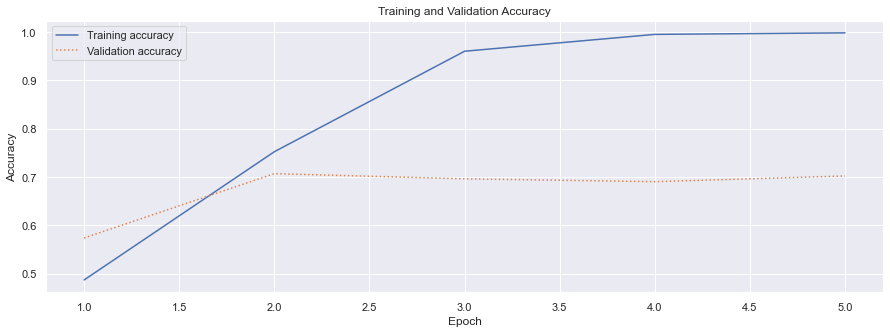

In [24]:
import seaborn as sns

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

graph.plot(epochs, acc, '-', label='Training accuracy')
graph.plot(epochs, val, ':', label='Validation accuracy')
graph.title('Training and Validation Accuracy')
graph.xlabel('Epoch')
graph.ylabel('Accuracy')
graph.legend(loc='upper left')
graph.plot()

[]

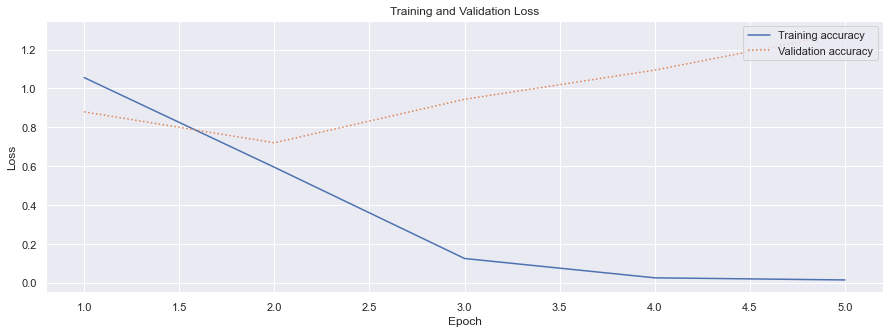

In [25]:
sns.set()
loss = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

graph.plot(epochs, loss, '-', label='Training accuracy')
graph.plot(epochs, val, ':', label='Validation accuracy')
graph.title('Training and Validation Loss')
graph.xlabel('Epoch')
graph.ylabel('Loss')
graph.legend(loc='upper right')
graph.plot()

In [26]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 70.22%


In [29]:
def categorise(text):
    text = re.sub('[^ a-z]', ' ', re.sub("'", '', re.sub("'s", ' ', text.lower())))
    text = re.sub(' +', ' ', text).strip()
    text = word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text]
    
    input = []
    for word in text:
        if word in word_dict:
            input.append(word_dict[word])
        else:
            input.append(0)
    
    padded_input = sequence.pad_sequences([input], maxlen=max_length)
    
    genres = ["drama", "comedy", "horror", "action"]
    prediction = model.predict(np.array([padded_input][0]))[0]
    
    result = []
    for i in range(0, 4):
        print("%.2f%% %s" % (prediction[i] * 100, genres[i]))
        if prediction[i] * 100 > 50:
            result.append(genres[i])
    
    return result

In [30]:
categorise("Sara Goldfarb, a widow who lives alone in a Brighton Beach apartment, spends her time watching television. Her son Harry is a heroin addict, along with his friend Tyrone and girlfriend Marion. The three traffic heroin in a bid to realize their dreams; Harry and Marion plan to open a clothing store for Marion's designs, while Tyrone seeks an escape from the ghetto and the approval of his mother. When Sara receives a call that she has been invited to her favorite game show, she begins a restrictive crash diet in an attempt to fit into a red dress that she wore at Harry's graduation. At the advice of a friend, Sara visits a physician who prescribes her amphetamines to control her appetite. She begins losing weight rapidly and is excited by how much energy she has. When Harry recognizes the signs of her drug abuse and implores her to stop taking the amphetamines, Sara insists that the chance to appear on television and the increased admiration from her friends are her remaining reasons to live. Sara becomes frantic waiting for the invitation and increases her dosage, which causes her to develop amphetamine psychosis. Tyrone is caught in a shootout between black traffickers and the Sicilian Mafia and is arrested despite his innocence. Harry has to use most of their earned money to post bail. The local supply of heroin becomes restricted, and they are unable to find any to buy. Eventually, Tyrone hears of a large shipment coming to New York from Florida, but the price has doubled and the minimum purchase is high. Harry encourages Marion to engage in prostitution with her psychiatrist, Arnold, for money. This request, along with their mounting withdrawal symptoms, strains their relationship. Sara's increased dosage of amphetamines distorts her sense of reality, and she begins to hallucinate that she is mocked by the host and crowd from the television show, and attacked by her refrigerator. Sara flees her apartment and goes to the casting agency office in Manhattan to confirm when she will be on television. Sara's disturbed state causes her to be admitted to a psychiatric ward, where she fails to respond to various medications. She undergoes electroconvulsive therapy instead. Harry and Tyrone travel to Miami to buy heroin directly from the wholesaler. However, they are forced to stop at a hospital because of Harry's gangrenous arm. A shocked doctor realizes Harry and Tyrone's situation, and they are arrested. Back in New York, a desperate Marion sells her body to a pimp, Big Tim. She subjects herself to a humiliating sex show at his request, in exchange for more heroin. Sara's treatment leaves her in a dissociated and vegetative state, to the horror of her friends. Harry's arm is amputated, and he is emotionally distraught by the knowledge that Marion will not visit him. Marion returns home and lies on her sofa, clutching her score of heroin and surrounded by her crumpled and discarded clothing designs. Tyrone is taunted by racist prison guards while enduring a combination of manual labor and withdrawal symptoms. Each of the four characters curls into a fetal position. Sara imagines herself as the beautiful winner of the game show, with Harry—married and successful—arriving as a guest. Sara and Harry lovingly embrace.")

0.02% drama
57.50% comedy
42.46% horror
0.02% action


['comedy']